## 1. Dataset 만들기

##### resize + labeling

In [1]:
from PIL import Image
import os , glob
import numpy as np

def load_data(img_path, target_size=(28,28)):
    
    number_of_data = 0
    
    for dirpath, dirnames, filenames in os.walk(img_path): # 데이터의 총 개수을 계산한다.
        number_of_data += len(filenames)
    
    img_size = target_size[0]
    color = 3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0 # 가위 : 0, 바위 : 1, 보 : 2
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = Image.open(file)
        resized_img = resize_image(img, target_size=target_size)   
        imgs[idx,:,:,:] = np.array(resized_img, dtype=np.int32)    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx = idx + 1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = Image.open(file)
        resized_img = resize_image(img, target_size=target_size)
        imgs[idx,:,:,:] = np.array(resized_img, dtype=np.int32)    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx = idx + 1  
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = Image.open(file)
        resized_img = resize_image(img, target_size=target_size)
        imgs[idx,:,:,:] = np.array(resized_img, dtype=np.int32)    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2   # 보 : 2
        idx = idx + 1
        
    return imgs, labels


def resize_image(old_image, target_size=(28,28)):
    target_size = target_size
    new_image = old_image.resize(target_size, Image.ANTIALIAS)
    
    return new_image

In [2]:
train_list = ['사공', '수완', '호성','승민','재성', '지윤', '은서','민지', '범진', '보경', '영민']
test_list = ['은영', '재준', '효정']

base_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

train_image_list, train_label_list = [], [] # 이름별 data 모으기(Train)
test_image_list, test_label_list = [], []   # 이름별 data 모으기(Train)

for train_name in train_list:
    
    train_dir = os.path.join(base_dir, train_name)
    train, label = load_data(train_dir, target_size=(28,28)) # load_data 함수(노드ex1-7)
    train_image_list.append(train) 
    train_label_list.append(label)

for test_name in  test_list:
    test_dir = os.path.join(base_dir, test_name)
    test, label = load_data(test_dir, target_size=(28,28))   # load_data 함수(노드ex1-7)
    test_image_list.append(test)
    test_label_list.append(label)

x_train = np.concatenate(train_image_list, axis=0) # List에 있는 행렬 데이터 합치기
y_train = np.concatenate(train_label_list, axis=0)

x_test = np.concatenate(test_image_list, axis=0) #900개 샘플 중 300개 랜덤으로 선택
x_test = np.random.RandomState(seed=42).permutation(x_test)[:300]

y_test = np.concatenate(test_label_list, axis=0)
y_test = np.random.RandomState(seed=42).permutation(y_test)[:300]

x_train_norm = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) #min-max normalization
x_test_norm = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))

x_train shape: (3362, 28, 28, 3)
x_test shape: (300, 28, 28, 3)


#### Data 확인

라벨:  0


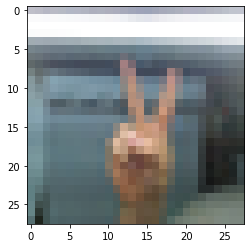

In [3]:
# Train data
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0]) ##28x28 img 

[0 1 2 2 0 2 1 1 0]


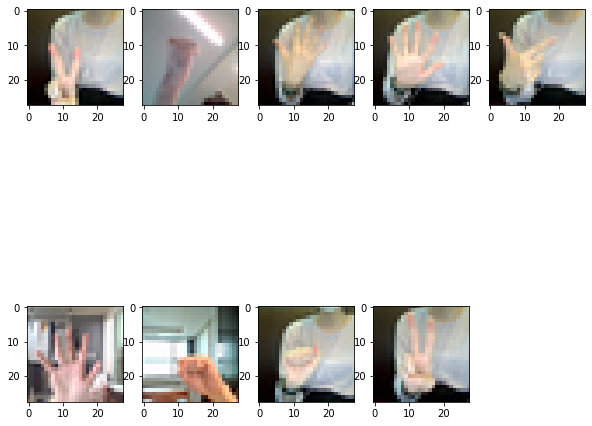

In [4]:
# Test data
plt.figure(figsize=(10,10))

print(y_test[:9]) #label

plt.subplot(251)
plt.imshow(x_test[0])

plt.subplot(252)
plt.imshow(x_test[1])

plt.subplot(253)
plt.imshow(x_test[2])

plt.subplot(254)
plt.imshow(x_test[3])

plt.subplot(255)
plt.imshow(x_test[4])

plt.subplot(256)
plt.imshow(x_test[5])

plt.subplot(257)
plt.imshow(x_test[6])

plt.subplot(258)
plt.imshow(x_test[7])

plt.subplot(259)
plt.imshow(x_test[8])

plt.show()

## 2. Model 정의하기

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요? 

#rgb datasets : 3 channel

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3))) #filter , kernel
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # number of class.y 

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (N

In [6]:
print(x_train.shape) #train datasets size : 28X28 , 300

(3362, 28, 28, 3)


In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=10) #epoch : train times  

Epoch 1/10
106/106 [==============================] - 8s 35ms/step - loss: 1.0845 - accuracy: 0.3742
Epoch 2/10
106/106 [==============================] - 1s 5ms/step - loss: 0.7703 - accuracy: 0.6798
Epoch 3/10
106/106 [==============================] - 1s 5ms/step - loss: 0.3500 - accuracy: 0.8764
Epoch 4/10
106/106 [==============================] - 1s 5ms/step - loss: 0.2519 - accuracy: 0.9067
Epoch 5/10
106/106 [==============================] - 0s 5ms/step - loss: 0.2101 - accuracy: 0.9278
Epoch 6/10
106/106 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9816
Epoch 7/10
106/106 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9806
Epoch 8/10
106/106 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9890
Epoch 9/10
106/106 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9922
Epoch 10/10
106/106 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.995

#### 학습 곡선 표시

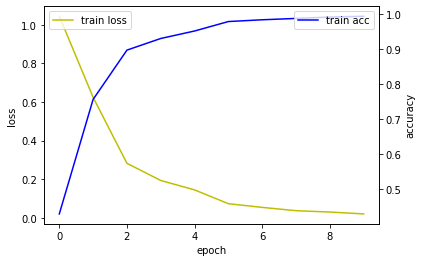

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## 3. Model 평가하기

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=1) #verbose : how detailed the output is . [0] :nothing , [1] : progress bar [2]show loss every mini batchs
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {0:.4f}".format(test_accuracy))

10/10 [==============================] - 0s 3ms/step - loss: 2.8186 - accuracy: 0.6567
test_loss: 2.8185713291168213 
test_accuracy: 0.6567


## 4. 정리

- [Google teachablemachine](https://teachablemachine.withgoogle.com/)를 활용하여 학습에 사용될 가위, 바위, 보 데이터셋을 직접 구성했다.

이때 초기 데이터셋은 가위 , 바위 , 보 각각 모두 100개씩으로 구성했다. 분류할 것이 많지 않아 우선 적은 데이터로 학습을 시도했다.   
전처리로 기존 224x224의 원본 이미지를 28x28의 크기로 조정후 min-max 정규화를 진행했다.

- Convolution layer와 Max-pooling을 사용해 다음과 같이 모델을 구성했다.

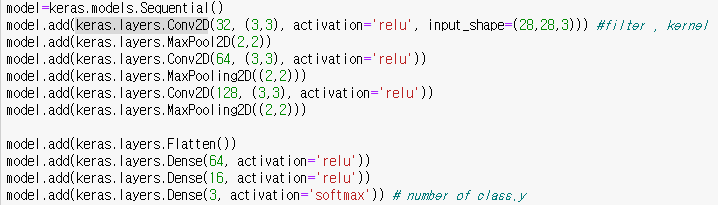

간단한 분류 문제라서 그런지 95% 이상의 높은 정확도로 모델이 학습됐다.

위 모델을 사용해 다른 사람들이 만든 가위,바위,보 사진을 예측했지만 겨우 33% 정도의 정확도를 기록했다. 단순 찍기에 불과한 결과가 나왔다.

 #### 훈련에 사용된 데이터셋이 300개 정도로 매우 적었기 때문에 다른 사람들이 만든 데이터셋을 활용해 훈련 데이터를 늘려서 정확도를 개선하고자 했다.   

- 다른 10명의 데이터셋을 추가로 훈련 데이터에 포함한 뒤 기존 테스트 데이터셋을 이용해 모델을 평가했다. 이를 통해 정확도가 약 66% 정도로 향상됐다. 

- 위 학습의 진행 과정 , 학습 결과를 jupyter notebook에 기록했다.